In [10]:
from torch_geometric.data import Data
import torch
import numpy as np

In [26]:
edge_index = torch.tensor([[3,5,6,2,4],[5,3,2,6,6]],dtype=torch.long)
x = torch.tensor([[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15],[1,33,4],[12, 4, 2]],dtype=torch.float)
y = torch.tensor([0,1,0,1,0,0,1],dtype=torch.long)
data = Data(x=x,edge_index=edge_index,y=y)

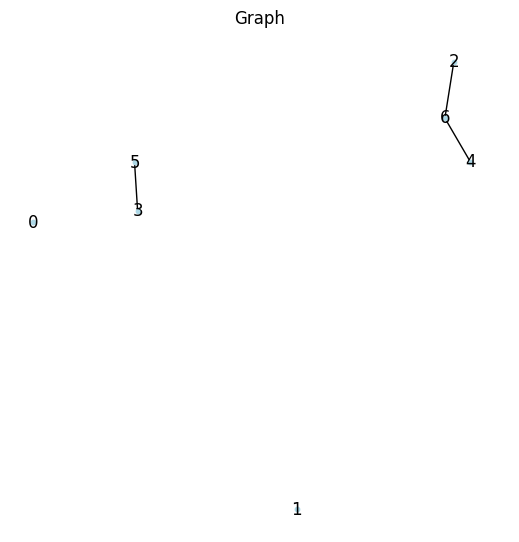

In [27]:
#convert graph to networkx
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

#convert to networkx with node attributes
G = to_networkx(data, to_undirected=True)
#plot
plt.figure(figsize=(5,5))
pos = nx.spring_layout(G)
nx.draw(G,pos,node_size=10,node_color='lightblue',with_labels=True)
plt.title('Graph')
plt.show()


In [13]:
from torch_geometric.utils import *

H = subgraph(edge_index=data.edge_index, subset=[[1,2,4,6]], relabel_nodes=False)

In [14]:
data.edge_index

tensor([[3, 5, 6, 2, 4],
        [5, 3, 2, 6, 6]])

In [15]:
H

(tensor([[6, 2, 4],
         [2, 6, 6]]),
 None)

In [16]:
data.x

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.],
        [13., 14., 15.],
        [ 1., 33.,  4.],
        [12.,  4.,  2.]])

In [17]:
#create a new x tensor with node 1,2,4,6
data.x[[1,2,4,6]]


tensor([[ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [13., 14., 15.],
        [12.,  4.,  2.]])

In [18]:
list_of_nodes = [1,2,4,6]
#convert to numpy ndarray
import numpy as np
list_of_nodes = np.array(list_of_nodes)

In [19]:
coarsen_node = 6

In [20]:
list_of_nodes+coarsen_node

array([ 7,  8, 10, 12])

In [21]:
subgraph_edge_index = subgraph(edge_index=data.edge_index, subset=torch.tensor(list_of_nodes), relabel_nodes=True)

In [22]:
M = Data(x=data.x[list_of_nodes],edge_index=subgraph_edge_index[0], y=data.y[list_of_nodes], mapping={int(value): i for i, value in enumerate(list_of_nodes)})

In [23]:
M.num_nodes

4

In [24]:
M.edge_index, M.mapping

(tensor([[3, 1, 2],
         [1, 3, 3]]),
 {1: 0, 2: 1, 4: 2, 6: 3})

In [25]:
for key, value in M.mapping.items():
    print(key, value)

1 0
2 1
4 2
6 3


In [1]:
import torch
A = torch.rand(0,7)
A.shape, A

(torch.Size([0, 7]), tensor([], size=(0, 7)))

In [1]:
import torch
from network import *


model = Net1(2, 1433, 512, 7)

In [9]:
model.load_state_dict(torch.load('/hdfs1/Data/Shubhajit/CoPart-GNN/save/cora_extra_fixed_03/model1.pt'))

<All keys matched successfully>

In [10]:
#layers in the model
for name, param in model.named_parameters():
    print(name, param.shape)

conv.0.bias torch.Size([512])
conv.0.lin.weight torch.Size([512, 1433])
conv.1.bias torch.Size([512])
conv.1.lin.weight torch.Size([512, 512])
lt1.weight torch.Size([7, 512])
lt1.bias torch.Size([7])


In [12]:
for param in model.conv.parameters():
    print(param)

Parameter containing:
tensor([ 2.8461e-04,  3.4568e-04,  1.8534e-03, -3.9286e-04,  1.1731e-03,
         5.2608e-04,  4.9994e-04,  5.3805e-04, -1.4722e-04, -3.7439e-04,
        -2.8052e-04,  8.1055e-05,  4.6440e-04, -5.8275e-04,  3.0371e-04,
         1.1596e-03,  1.2366e-04, -8.0446e-04, -5.2435e-04,  6.4678e-04,
         6.3201e-04, -1.0931e-04,  3.4541e-05,  3.6613e-05,  2.4861e-04,
        -7.7003e-04, -1.0826e-04, -2.2499e-04,  7.3164e-04,  1.7493e-03,
        -2.5313e-04,  3.9330e-04, -1.2151e-04, -8.5971e-04, -5.7801e-04,
        -9.8087e-04, -1.5914e-03,  7.1736e-04, -8.5266e-04,  8.7409e-04,
         8.2979e-04, -3.7865e-04,  1.4044e-04, -5.9125e-04, -3.1668e-04,
         1.4907e-03,  1.0195e-04, -2.5064e-04, -1.0398e-05,  4.5172e-04,
        -1.0282e-03,  9.0043e-04, -1.2780e-03, -2.3934e-04,  5.3825e-04,
         6.9820e-04,  6.6255e-04, -4.3769e-04,  2.7726e-04, -1.1667e-03,
         6.7003e-04,  6.4378e-04, -3.5317e-04,  2.3549e-04, -1.3096e-03,
         9.2167e-04,  3.1740e